# Preloaded code

In [7]:
import pandas as pd
import numpy as np
SEED = 42
# Загрузите данные из файла travel_insurance.csva
data = pd.read_csv('travel_insurance.csv', index_col=0)

# Проверьте данные на пропуски
data.isna().sum()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata

# Урок 1. Классификация через уверенность в принадлежности к классу

### Задание - обучить логистическую регрессию

- Импортируйте функцию LogisticRegression из модуля sklearn.linear_model
- Импортируйте функцию для расчета метрики precision_score из модуля sklearn.metrics
- Объявите модель, создав переменную log_reg и записав в нее результат функции LogisticRegression()
- Обучите модель log_reg методом fit() на тренировочных данных X_train, y_train
- Сделайте прогноз по модели log_reg методом predict на тестовых данных и запишите прогноз в переменную y_pred_lr
- Посчитайте метрику качества precision и сохраните ее в переменную precision_lr

In [2]:
# Импортируйте функцию LogisticRegression
from sklearn.linear_model import LogisticRegression
# Импортируйте функцию для расчета метрики precision_score
from sklearn.metrics import precision_score

# Объявите модель 
log_reg = LogisticRegression()

# Обучите
log_reg.fit(X_train, y_train)

# Сделайте прогноз
y_pred_lr = log_reg.predict(X_test)

# Посчитайте метрику качества и сохраните ее в переменную
precision_lr = precision_score(y_test, y_pred_lr)

# Выведите ее на печать
print(precision_lr)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.0


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


### Задание - сделать прогноз вероятности 

- Сделайте прогноз модели log_reg на тестовых данных, который оценит вероятность принадлежности к классу
- Выведите на печать первые 5 наблюдений
- Сохраните вероятности принадлежности к классу 1. 


In [3]:
# Сделайте прогноз по вероятностям
y_pred_lr_proba = log_reg.predict_proba(X_test)
# Выведите на печать первые 5 наблюдений
print(y_pred_lr_proba[:5])
# Сохраните вероятности принадлежности к классу. 
y_pred_lr_proba = y_pred_lr_proba[:, 1]

[[0.99385527 0.00614473]
 [0.99723634 0.00276366]
 [0.99313221 0.00686779]
 [0.99525003 0.00474997]
 [0.99433804 0.00566196]]


### Задание - пороги
- Задайте порог, равный 0.6
- Замените значения, превышающие порог, на 1
- Замените значения, которые не больше порога, на 0
- Рассчитайте precision_score

In [4]:
# Задайте порог
threshold = 0.6
# Замените значения, превышающие порог, на 1
y_pred_lr_proba[y_pred_lr_proba > threshold] = 1
# Замените значения, которые не больше порога, на 0
y_pred_lr_proba[y_pred_lr_proba <= threshold] = 0
# Рассчитайте precision_score
print(precision_score(y_test, y_pred_lr_proba))

0.0


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


### Задание - перебор порогов
- Создайте последовательность thresholds из 10 значений порогов от 0 до 1 с шагом 0.1. Воспользуйтесь функций np.arange, указав параметр step=0.1, а диапазон перебора от 1 до 10
- В цикле переберите пороги и рассчитайте метрику качества:
1. Сделайте прогноз вероятности принадлежности к классу 1 методом predict_proba()
2. Замените значения, превышающие порог, на 1
3. Замените значения, которые не больше порога, на 0
4. Выведите на печать порог и значение precision_score


In [8]:
# Создайте последовательность из 10 значений порогов от 0 до 1 с шагом 0.1
threshholds = np.arange(0, 1, step=0.1)
# В цикле переберите пороги и рассчитайте метрику качества
for threshold in threshholds:
    # Сделайте прогноз вероятности принадлежности к классу 1
    y_pred_lr_proba_thr = log_reg.predict_proba(X_test)[:, 1]
    # Замените значения, превышающие порог, на 1
    y_pred_lr_proba_thr[y_pred_lr_proba_thr > threshold] = 1
    # Замените значения, которые не больше порога, на 0
    y_pred_lr_proba_thr[y_pred_lr_proba_thr <= threshold] = 0
    print('Threshold:' , threshold, 'Precision:', precision_score(y_test, y_pred_lr_proba_thr))

Threshold: 0.0 Precision: 0.014211274277593557
Threshold: 0.1 Precision: 0.10566037735849057
Threshold: 0.2 Precision: 0.0
Threshold: 0.30000000000000004 Precision: 0.0
Threshold: 0.4 Precision: 0.0
Threshold: 0.5 Precision: 0.0
Threshold: 0.6000000000000001 Precision: 0.0
Threshold: 0.7000000000000001 Precision: 0.0
Threshold: 0.8 Precision: 0.0
Threshold: 0.9 Precision: 0.0


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarnin

# Урок 2. PR и ROC-AUC

### Задание -  PR-кривая
- Получите прогнозы по вероятности принадлежности к классу 1. Примените метод predict_proba к тестовой выборке X_test, а затем из получившеговся двухмерного массива отберите вторую колонку [:, 1]
- Импортируйте функцию precision_recall_curve из модуля sklearn.metrics
- Вызовите функцию precision_recall_curve, передав в нее два параметра: y_test и y_pred_lr_proba. Результат сохраните в трех переменных: precision, recall, thresholds
- Импортируйте модуль matplotlib.pyplot, чтобы отрисовалась PR-кривая

In [9]:
# Получите прогнозы по вероятности принадлежности к классу 1
y_pred_lr_proba = log_reg.predict_proba(X_test)[:, 1]

# Импортируйте функцию precision_recall_curve
from sklearn.metrics import precision_recall_curve

# Сохраните ее результат в переменные: precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_lr_proba)

# Импортируйте модуль matplotlib.pyplot
import matplotlib.pyplot as plt

# Код не пишется слушателем, а предзагружен
plt.figure(figsize=(10,10))
plt.step(recall, precision, color='b', alpha=0.5,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve')
plt.show()

print("Пороги для вероятностей:", thresholds)

<Figure size 1000x1000 with 1 Axes>

Пороги для вероятностей: [0.00088261 0.00088616 0.00089072 ... 0.31183211 0.32075908 0.40777401]


### Задание руками -  площадь по PR-кривой

### Задание ROC-кривая

- Получите прогнозы по вероятности принадлежности к классу 1. Примените метод predict_proba к тестовой выборке X_test, а затем из получившеговся двухмерного массива отберите вторую колонку [:, 1]
- Импортируйте функцию roc_curve из модуля sklearn.metrics
- Вызовите функцию roc_curve, передав в нее два параметра: y_test и y_pred_lr_proba. Результат сохраните в трех переменных: fpr, tpr, thresholds

In [10]:
# Получите прогнозы по вероятности принадлежности к классу 1
y_pred_lr_proba = log_reg.predict_proba(X_test)[:, 1]

# Импортируйте функцию roc_curve
from sklearn.metrics import roc_curve

# Сохраните ее результат в переменные: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr_proba)

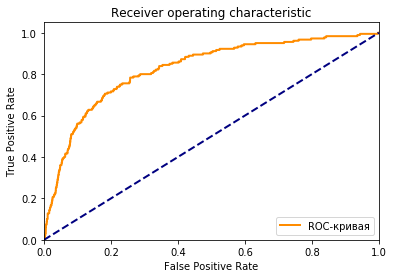

In [11]:
# Код не пишется слушателем, а предзагружен
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC-кривая')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Задание - площадь под ROC-кривой
- Импортируйте функцию roc_auc_score из модуля sklearn.metrics
- Посчитайте площадь под ROC-кривой. Используйте функцию roc_auc_score, в которую нужно передать два параметра y_test, y_pred_lr_proba

In [12]:
# Импортируйте функцию roc_auc_score
from sklearn.metrics import roc_auc_score

# Посчитайте площадь под ROC-кривой
roc_auc_log_reg = roc_auc_score(y_test, y_pred_lr_proba)
print(roc_auc_log_reg)

0.8252095680495488


### Задание - площадь под ROC-кривой руками

# Урок 3: Оценка моделей по ROC_AUC

### Задание: ROC-AUC для решающего дерева
- Импортируйте функцию DecisionTreeClassifier из модуля sklearn.tree
- Объявите модель, вызвав функцию DecisionTreeClassifier(random_state=SEED)
- Обучите модель методом fit: передайте тренировочные данные X_train, y_train
- Получите прогнозы по вероятности принадлежности к классу 1. Примените метод predict_proba к тестовой выборке X_test, а затем из получившеговся двухмерного массива отберите вторую колонку [:, 1]
- Посчитайте roc_auc_score для решающего дерева и сохраните в переменную roc_auc_tree
- Выведите на печать roc_auc_score

In [13]:
# Импортируйте функцию DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Объявите модель
tree = DecisionTreeClassifier(random_state=SEED)
# Обучите
tree.fit(X_train, y_train)

# Сделайте прогноз для тестовой выборки 
y_pred_tree_proba = tree.predict_proba(X_test)[:, 1]

# Посчитайте roc_auc_score для случайного леса и сохраните в переменную roc_auc_tree
roc_auc_tree = roc_auc_score(y_test, y_pred_tree_proba)
print(roc_auc_tree)

0.5442337640379448


### Задание: ROC-AUC для  случайного леса
- Импортируйте функцию RandomForestClassifier из модуля sklearn.ensemble
- Объявите модель, вызвав функцию RandomForestClassifier(random_state=SEED)
- Обучите модель методом fit: передайте тренировочные данные X_train, y_train
- Получите прогнозы по вероятности принадлежности к классу 1. Примените метод predict_proba к тестовой выборке X_test, а затем из получившеговся двухмерного массива отберите вторую колонку [:, 1]
- Посчитайте roc_auc_score для случайного леса и сохраните в переменную roc_auc_rf
- Выведите на печать roc_auc_rf

In [14]:
# Импортируйте функцию RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Объявите модель
rf = RandomForestClassifier(random_state=SEED)
# Обучите
rf.fit(X_train, y_train)

# Сделайте прогноз для тестовой выборки
y_pred_test_rf_proba = rf.predict_proba(X_test)[:,1]

# Посчитайте roc_auc_score для случайного леса и сохраните в переменную f1_score_rf
roc_auc_rf = roc_auc_score(y_test, y_pred_test_rf_proba)
print(roc_auc_rf)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.6328205367789702


### Задание - собрать результаты по  ROC-AUC
- Создайте лист models_list с названиями моделей ['Логистическая регрессия', 'Решающее дерево', 'Случайный лес']
- Создайте лист Логистическая со значениями roc_auc_score для соответствующих моделей
- Соберите в словарь metrics_dict названия моделей и roc_auc_score; используйте два ключа: 'mode' и 'roc_auc'
- Обратите metrics_dict в датафрейм функцией pd.DataFrame и сохраните результат в переменную metrics_df
- Распечатайте metrics_df

In [15]:
# Создайте лист models_list с названиями моделей 
models_list = ['Логистическая регрессия', 'Решающее дерево', 'Случайный лес']
# Создайте лист roc_auc_list со значениями roc_auc_score для соответствующих моделей
roc_auc_list = [roc_auc_log_reg, roc_auc_tree, roc_auc_rf]
# Соберите в словарь metrics_dict
metrics_dict = {'model': models_list,
              'roc_auc': roc_auc_list}
# Создайте датафрейм metrics_df из этого словаря metrics_dict
metrics_df = pd.DataFrame(metrics_dict)
# Выведите на печать датафрейм metrics_df
metrics_df

,model,roc_auc
0,Логистическая регрессия,0.825210
1,Решающее дерево,0.544234
2,Случайный лес,0.632821


# Урок 4: Upsampling

###  Задание - поиск миноритарного класса
Визуализируйте распределение классов, чтобы найти миноритарный класс:
- посчитайте частоту появления классов в y_train методом value_counts()
- примените метод plot(), чтобы нарисовать столбцовую диаграмму; укажите параметр kind='bar'


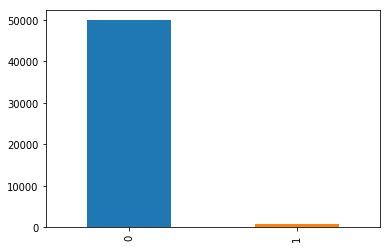

In [16]:
# Визуализируйте распределение классов, чтобы найти миноритарный класс
y_train.value_counts().plot(kind='bar')

### Задание - количество элементов класса
- Посчитайте количество нулей в y_train: сделайте срез столбца y_train по условию y_train == 0 и примените метод count(). Распечатайте результат
- Посчитайте количество единиц в y_train: сделайте срез столбца y_train по условию y_train == 1 и примените метод count(). Распечатайте результат

In [17]:
# Посчитайте количество нулей в y_train
print(y_train[y_train == 0].count())
# Посчитайте количество единиц в y_train
print(y_train[y_train == 1].count())

49913
747


###  Задание - подготовка к upsampling
- Задайте параметр k, равный 6
- Сделайте копию обучающей выборки в переменную X_train_upsampled - в ней будет хранится сбалансированная выборка
- Сделайте срез данных из X_train, соответствующих миноритарному классу, и сохраните в переменную minor_class. В качестве условия среза примените y_train == 1

In [18]:
# Задайте параметр k, равный 6
k = 6

# Сделайте копию обучающей выборки в переменную, в которой будет хранится модель 
X_train_upsampled = X_train

# Сделайте срез данных, соответствующих миноритарному классу, и сохраните в переменную minor_class
minor_class =  X_train[y_train == 1]

###  Задание -  upsampling матрицы признаков
- В цикле k раз допишите в X_train_upsampled датафрейм minor_class. Используйте функцию pd.concat для дозаписи minor_class в X_train_upsampled. Аргументов функции является лист [X_train_upsampled, minor_class]
- Сбросьте индекс методом reset_index() c параметром drop=True, чтобы в таблице не было дублирущихся индексов после конкатенирования таблиц


In [19]:
# В цикле k раз допишите в X_train_upsampled датафрейм minor_class
for i in range(k):
    X_train_upsampled = pd.concat([X_train_upsampled, minor_class], axis=0)

# Сбросьте индекс, чтобы в таблице не было дублирущихся индексов
X_train_upsampled = X_train_upsampled.reset_index(drop=True)    

###  Задание -  upsampling целевой переменной
- Создайте вектор ones с единицами, ее размер - длина датафрейма minor_class, умноженная на k. Используйте функцию np.ones()
- Удлините вектор целевой переменной тренировочной выборки: объедините y_train и ones функцией pd.concat()
- Сбросьте индекс методом reset_index() c параметром drop=Truе для удаления дублирующихся индексов после объединения столбцов

In [20]:
# Создайте вектор ones
ones = np.ones(len(minor_class)*k)
# Удлините вектор целевой переменной тренировочной выборки
y_train_upsampled = pd.concat([y_train, pd.Series(ones)])
# Сбросьте индекс, чтобы в таблице не было дублирущихся индексов
y_train_upsampled = y_train_upsampled.reset_index(drop=True)

###  Задание -  шаффл данных
- Импортируйте функцию shuffle из модуля sklearn.utils
- Перемешайте данные: передайте в функцию shuffle X_train_upsampled, y_train_upsampled, а результат перезапишите в тех же переменных 

In [21]:
# Импортируйте функцию shuffle
from sklearn.utils import shuffle
# Перемешайте данные
X_train_upsampled, y_train_upsampled = shuffle(X_train_upsampled, y_train_upsampled, random_state=SEED)

###  Задание -  Логрегрессия на upsample данных
- Объявите модель LogisticRegression()
- Обучите модель методом fit на семплированных данных
- - Получите прогнозы по вероятности принадлежности к классу 1. Примените метод predict_proba к тестовой выборке X_test, а затем из получившеговся двухмерного массива отберите вторую колонку [:, 1]
- Посчитайте roc_auc_score для логистической регрессии и сохраните в переменную roc_auc_lg_ups
- Распечатайте roc_auc_lg_ups

In [22]:
# Объявите модель
log_reg_ups = LogisticRegression(random_state=SEED)
# Обучите на сэмплированных данных 
log_reg_ups.fit(X_train_upsampled, y_train_upsampled)
# Спрогнозируйте вероятность принадлежности к классу 1
y_pred_log_reg_ups = log_reg_ups.predict_proba(X_test)[:, 1]
# Посчитайте roc_auc_score
roc_auc_lg_ups = roc_auc_score(y_test, y_pred_log_reg_ups)
# Распечатайте результат
print(roc_auc_lg_ups)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.821220211080855


###  Задание -  Решающее дерево на upsample данных
- Объявите модель DecisionTreeClassifier()
- Обучите модель методом fit на семплированных данных
- - Получите прогнозы по вероятности принадлежности к классу 1. Примените метод predict_proba к тестовой выборке X_test, а затем из получившеговся двухмерного массива отберите вторую колонку [:, 1]
- Посчитайте roc_auc_score для решающего дерева и сохраните в переменную roc_auc_tree_ups
- Распечатайте roc_auc_tree_ups

In [23]:
# Объявите модель
tree_ups = DecisionTreeClassifier(random_state=SEED)

# Обучите на сэмплированных данных 
tree_ups.fit(X_train_upsampled, y_train_upsampled)

# Спрогнозируйте вероятность принадлежности к классу 1
y_pred_tree_ups = tree_ups.predict_proba(X_test)[:, 1]

# Посчитайте roc_auc_score
roc_auc_tree_ups = roc_auc_score(y_test, y_pred_tree_ups)

# Распечатайте результат
print(roc_auc_tree_ups)

0.5360817448876075


###  Задание -  Случайный лес на upsample данных
- Объявите модель RandomForestClassifier()
- Обучите модель методом fit на семплированных данных
- Получите прогнозы по вероятности принадлежности к классу 1. Примените метод predict_proba к тестовой выборке X_test, а затем из получившеговся двухмерного массива отберите вторую колонку [:, 1]
- Посчитайте roc_auc_score для случайного леса и сохраните в переменную roc_auc_rf_ups
- Распечатайте roc_auc_rf_ups

In [24]:
# Объявите модель
rf_ups = RandomForestClassifier(random_state=SEED)

# Обучите на сэмплированных данных 
rf_ups.fit(X_train_upsampled, y_train_upsampled)

# Спрогнозируйте вероятность принадлежности к классу 1
y_pred_rf_ups = rf_ups.predict_proba(X_test)[:, 1]

# Посчитайте roc_auc_score
roc_auc_rf_ups = roc_auc_score(y_test, y_pred_rf_ups)

# Распечатайте результат
print(roc_auc_rf_ups)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.6306000498335915


# Урок 5: Subsampling

### Subsampling - подготовка
- Выделите данные для объектов с меткой 1 в отдельную переменную minor_class. Сделайте срез X_train по условию y_train == 1.
- В переменной minor_class_size сохраните количество строк датафрейма minor_class. Запишите в переменную первое значение из поля shape
- Выделите данные для объектов с меткой 0 в отдельную переменную major_class. Сделайте срез X_train по условию y_train == 0.
- В переменной major_class_size сохраните количество строк датафрейма major_class. Запишите в переменную первое значение из поля shape

In [25]:
# - Выделите данные для объектов с меткой 1 в отдельную переменную minor_class. 
minor_class = X_train[y_train == 1]
# В переменной minor_class_size сохраните количество строк датафрейма minor_class
minor_class_size = minor_class.shape[0]
# Выделите данные для объектов с меткой 0 в отдельную переменную major_class
major_class = X_train[y_train == 0]
# В переменной major_class_size сохраните количество строк датафрейма major_class
major_class_size = major_class.shape[0]

### Subsampling - матрица признаков

- Сгенерируйте подвыборку размера minor_class_size из данных основного класса major_class. Примените метод sample к датафрейму major_class, указав параметром размер  minor_class_size. 
- Объедините major_class_sample и minor_class в одну таблицу функцией pd.concat()
- Сбросьте индекс методом reset_index() c параметром drop=True, чтобы в таблице не было дублирущихся индексов после конкатенирования таблиц

In [26]:
# Сгенерируйте подвыборку размера minor_class_size
major_class_sample = major_class.sample(minor_class_size)
# Объедините major_class_sample и minor_class в одну таблицу
X_train_subsampled = pd.concat([major_class_sample, minor_class], axis=0)
# Сбросьте индекс
X_train_subsampled.reset_index(drop=True, inplace=True)

### Subsampling - целевая переменная
- Создайте y_major_class, состоящий из нулей. Для этого сгенерируйте последовательность из нулей длины minor_class_size функцией np.zeros(), а затем обратите массив в pandas Series функцией pd.Series
- Создайте y_minor_class, состоящий из единиц. Для этого сгенерируйте последовательность из единиц длины minor_class_size функцией np.ones(), а затем обратите массив в pandas Series функцией pd.Series
- Объедините y_major_class и y_minor_class в y_train_subsampled функцией pd.concat()
- Сбросьте индекс методом reset_index() c параметром drop=True, чтобы в таблице не было дублирущихся индексов после конкатенирования таблиц

In [27]:
# Создайте y_major_class, состоящий из нулей
y_major_class = pd.Series(np.zeros(minor_class_size))
# Создайте y_minor_class, состоящий из единиц
y_minor_class = pd.Series(np.ones(minor_class_size))
# Объедините y_major_class и y_minor_class в y_train_subsampled
y_train_subsampled = pd.concat([y_major_class, y_minor_class])
# Сбросьте индекс методом reset_index()
y_train_subsampled.reset_index(drop=True, inplace=True)

###  Задание -  Логрегрессия на subsampled данных
- Объявите модель LogisticRegression()
- Обучите модель методом fit на семплированных данных
- Получите прогнозы по вероятности принадлежности к классу 1. Примените метод predict_proba к тестовой выборке X_test, а затем из получившеговся двухмерного массива отберите вторую колонку [:, 1]
- Посчитайте roc_auc_score для логистической регрессии и сохраните в переменную roc_auc_lg_subs
- Распечатайте roc_auc_lg_subs

In [28]:
# Объявите модель
log_reg_subs = LogisticRegression(random_state=SEED)

# Обучите на сэмплированных данных 
log_reg_subs.fit(X_train_subsampled, y_train_subsampled)

# Спрогнозируйте вероятность принадлежности к классу 1
y_pred_log_reg_subs = log_reg_subs.predict_proba(X_test)[:, 1]

# Посчитайте roc_auc_score
roc_auc_lg_subs = roc_auc_score(y_test, y_pred_log_reg_subs)

# Распечатайте результат
print(roc_auc_lg_subs)

0.816076227597131


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


###  Задание -  Решающее дерево на subsampled данных
- Объявите модель DecisionTreeClassifier()
- Обучите модель методом fit на семплированных данных
- - Получите прогнозы по вероятности принадлежности к классу 1. Примените метод predict_proba к тестовой выборке X_test, а затем из получившеговся двухмерного массива отберите вторую колонку [:, 1]
- Посчитайте roc_auc_score для решающего дерева и сохраните в переменную roc_auc_tree_subs
- Распечатайте roc_auc_tree_subs

In [29]:
# Объявите модель
tree_subs = DecisionTreeClassifier(random_state=SEED)

# Обучите на сэмплированных данных 
tree_subs.fit(X_train_subsampled, y_train_subsampled)

# Спрогнозируйте вероятность принадлежности к классу 1
y_pred_tree_subs = tree_subs.predict_proba(X_test)[:, 1]

# Посчитайте roc_auc_score
roc_auc_tree_subs = roc_auc_score(y_test, y_pred_tree_subs)

# Распечатайте результат
print(roc_auc_tree_subs)

0.6982059907095948


###  Задание -  Случайный лес на subsampled данных
- Объявите модель RandomForestClassifier()
- Обучите модель методом fit на семплированных данных
- Получите прогнозы по вероятности принадлежности к классу 1. Примените метод predict_proba к тестовой выборке X_test, а затем из получившеговся двухмерного массива отберите вторую колонку [:, 1]
- Посчитайте roc_auc_score для случайного леса и сохраните в переменную roc_auc_rf_subs
- Распечатайте roc_auc_rf_subs

In [30]:
# Объявите модель
rf_subs = RandomForestClassifier(random_state=SEED)

# Обучите на сэмплированных данных 
rf_subs.fit(X_train_subsampled, y_train_subsampled)

# Спрогнозируйте вероятность принадлежности к классу 1
y_pred_rf_subs = rf_subs.predict_proba(X_test)[:, 1]

# Посчитайте roc_auc_score
roc_auc_rf_subs = roc_auc_score(y_test, y_pred_rf_subs)

# Распечатайте результат
print(roc_auc_rf_subs)

0.7985621674052718


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# Урок 6. Перевзвешивание в алгоритмах

###  Задание -  Логрегрессия weighted
- Объявите модель LogisticRegression() c параметром class_weight='balanced'
- Обучите модель методом fit на семплированных данных
- Получите прогнозы по вероятности принадлежности к классу 1. Примените метод predict_proba к тестовой выборке X_test, а затем из получившеговся двухмерного массива отберите вторую колонку [:, 1]
- Посчитайте roc_auc_score для логистической регрессии и сохраните в переменную roc_auc_lg_bal
- Распечатайте roc_auc_lg_bal

In [31]:
# Объявите модель
log_reg_bal = LogisticRegression(class_weight='balanced', random_state=SEED)

# Обучите на сэмплированных данных 
log_reg_bal.fit(X_train, y_train)

# Спрогнозируйте вероятность принадлежности к классу 1
y_pred_log_reg_bal = log_reg_bal.predict_proba(X_test)[:, 1]

# Посчитайте roc_auc_score
roc_auc_lg_bal = roc_auc_score(y_test, y_pred_log_reg_bal)

# Распечатайте результат
print(roc_auc_lg_bal)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8148343922971506


###  Задание -  Решающее дерево на subsampled данных
- Объявите модель DecisionTreeClassifier() c параметром class_weight='balanced'
- Обучите модель методом fit на семплированных данных
- Получите прогнозы по вероятности принадлежности к классу 1. Примените метод predict_proba к тестовой выборке X_test, а затем из получившеговся двухмерного массива отберите вторую колонку [:, 1]
- Посчитайте roc_auc_score для решающего дерева и сохраните в переменную roc_auc_tree_bal
- Распечатайте roc_auc_tree_bal

In [32]:
# Объявите модель
tree_bal = DecisionTreeClassifier(class_weight='balanced', random_state=SEED)

# Обучите на сэмплированных данных 
tree_bal.fit(X_train, y_train)

# Спрогнозируйте вероятность принадлежности к классу 1
y_pred_tree_bal = tree_bal.predict_proba(X_test)[:, 1]

# Посчитайте roc_auc_score
roc_auc_tree_bal = roc_auc_score(y_test, y_pred_tree_bal)

# Распечатайте результат
print(roc_auc_tree_bal)

0.5465201025148166


###  Задание -  Случайный лес на subsampled данных
- Объявите модель RandomForestClassifier() c параметром class_weight='balanced'
- Обучите модель методом fit на семплированных данных
- Получите прогнозы по вероятности принадлежности к классу 1. Примените метод predict_proba к тестовой выборке X_test, а затем из получившеговся двухмерного массива отберите вторую колонку [:, 1]
- Посчитайте roc_auc_score для случайного леса и сохраните в переменную roc_auc_rf_bal
- Распечатайте roc_auc_rf_bal

In [33]:
# Объявите модель
rf_bal = RandomForestClassifier(class_weight='balanced', random_state=SEED)

# Обучите на сэмплированных данных 
rf_bal.fit(X_train, y_train)

# Спрогнозируйте вероятность принадлежности к классу 1
y_pred_rf_bal = rf_bal.predict_proba(X_test)[:, 1]

# Посчитайте roc_auc_score
roc_auc_rf_bal = roc_auc_score(y_test, y_pred_rf_bal)

# Распечатайте результат
print(roc_auc_rf_bal)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.6297769056899282
